In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def local(L,num):

  right = num+1
  if right % L == 0:
    right -= L

  left = num-1
  if (left+1) % L == 0:
    left += L

  up = num - L
  if up < 0:
    up += L*L

  down = num + L
  if down >= L*L:
    down -= L*L

  return np.array([right,up,left,down])

In [ ]:
def wolff(S, beta, steps):
    L=np.sqrt(len(S))
    P = 1-np.exp(-2*beta)
    m_list=[]

    for t in range(steps):
        r_seed = np.random.randint(0,L*L)

        cluster=[r_seed] #클러스터 초기화
        nei = [r_seed] #nei 안의 요소들의 이웃을 봐야 한다.

        while nei != []:
          for i in local(L,nei.pop(0)): #nei 안의 요소들의 이웃을 확인
            i = int(i)
            if S[i] == S[r_seed]: #2차원 에너지 배열에서 상태가 같고,
              if i not in cluster: #클러스터에 아직 저장된 적도 없고,
                if np.random.random() < P: #확률 안에 들었으면,

                  cluster = [i]+cluster #클러스터에 추가
                  nei = [i] + nei #그리고 이 이웃의 이웃도 보기 위해 nei에 저장

        for i in cluster:#클러스터에 들어있는 모든 요소들을 뒤집는다.
          S[i] *= -1

        m_list.append(abs(np.sum(S)/len(S)))
    return m_list

In [ ]:
L=5
S = np.random.choice([-1,+1],size=L*L) #무작위 배열(초기화된 배열)

m_m_list=[]
for i in range(0,100):# 베타범위 0.01간격으로 100개
  beta = i/100
  #S = np.random.choice([-1,+1],size=L*L) #for문마다 새로운 초기화 배열을 만드는 것을 생략함. 대신 1000개 샘플 중 앞의 500개 제거
  m_list = wolff(S, beta, 1000)
  m_m_list.append(abs(sum(m_list[500:])/500)) #앞의 500개 샘플은 제거

Text(0, 0.5, 'm_mean')

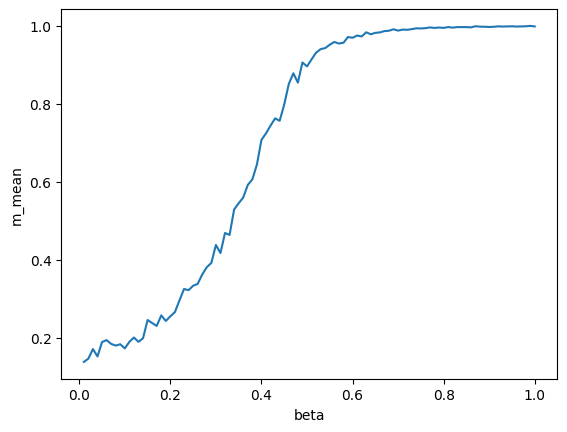

In [ ]:
plt.plot(np.arange(1,101)*0.01,m_m_list)
plt.xlabel('beta')
plt.ylabel('m_mean')

In [ ]:
L=20
S = np.random.choice([-1,+1],size=L*L) #무작위 배열(초기화된 배열)

m_m_list_1=[]
for i in range(0,100):# 베타범위 0.01간격으로 100개
  beta = i/100
  m_list = wolff(S, beta, 1000)
  m_m_list_1.append(abs(sum(m_list[500:])/500)) #앞의 500개 샘플은 제거

Text(0, 0.5, 'm_mean')

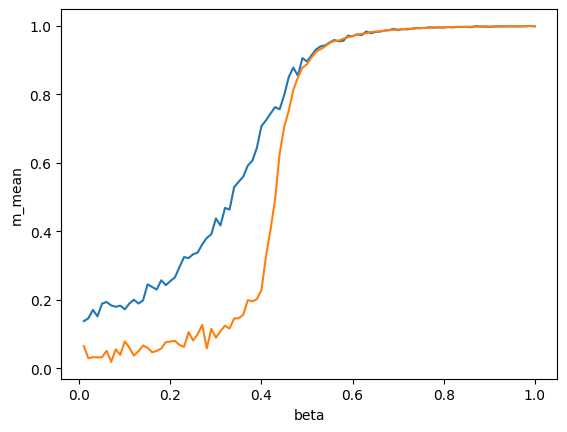

In [ ]:
plt.plot(np.arange(1,101)*0.01,m_m_list)
plt.plot(np.arange(1,101)*0.01,m_m_list_1)
plt.xlabel('beta')
plt.ylabel('m_mean')